<a href="https://colab.research.google.com/github/tiara567/Vehicle-Detection/blob/main/VehicleDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Environment
- check pyhton version (it should be python3) (Python 2 is no longer supported in Colab) (Python 3.7.12)
- install tensorflow 2.7 (updated version) (Already installed 2.7.0)



In [1]:
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Build Image Classifier Algorithm using CNN


1. Load downloaded kaggle dataset from drive (Vehicle and non-vehicles) 
2. Data preporocessing
3. CNN modelling
4. Model Evaluation and Tunning
5. Final Image Classifier (.model)




### Step 1: Load Downloaded Kaggle Dataset from Gdrive
1. Download file from kaggle, reduce the number of images (500/class). then , upload to the Gdrive
https://www.kaggle.com/brsdincer/vehicle-detection-image-set
2. Mount GDrive to google colab
3. Locate the dataset file (dataset_BBG2) in google drive (DATADIR = data direction)
*   https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971
*   https://www.youtube.com/watch?v=UfIQon2fAh8









In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATADIR = "drive/My Drive/dataset_BBG2"

### Step 2: Data pre-processing
1. BGR to RGB
2. Re-size 300 X 300
3. Converts to array
4. re-scale array to 0-1
4. Save it as pickles (Feature and label)


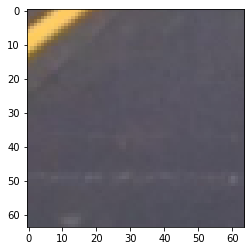

In [5]:
import numpy as np                   # working with array
import matplotlib.pyplot as plt      # data visualization (plot,graph,show the image)
import os                            # operation system (interact with the file system)
import cv2                           # image or video analysis

#define the classes or categories
CATEGORIES = ["non-vehicles", "vehicles"]  

#load the dataset
for category in CATEGORIES:
    #path to dataset directory
    #define full path of the dataset
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        # note : dataset read as BGR
        img_array_bgr = cv2.imread(os.path.join(path,img)) #String to number
        # convert dataset from BGR to RGB
        img_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB)
        # visualize the dataset in form of image
        plt.imshow(img_rgb)
        plt.show()
        break
    break


(64, 64, 3) uint8
(300, 300, 3)


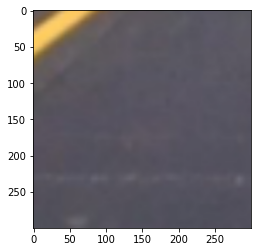

In [6]:
#observe the dimension and type of laod image
print(img_rgb.shape, img_rgb.dtype)

#resize image to 300X300 pixel
IMG_SIZE = 300
new_array = cv2.resize(img_rgb, (IMG_SIZE ,IMG_SIZE))

#observe the dimension of load image after resize
print (new_array.shape)

# visualize the load image after resized and converted in form of image
plt.imshow(new_array)
plt.show()

In [7]:
#create training data
#label 0 for vehicles and 1 for non-vehicles

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #path to data set directory
        class_num = CATEGORIES.index(category) #label as 0 and 1 instead of non-vehicles and vehicles
        for img in os.listdir(path):
            try:
                img_array_bgr = cv2.imread(os.path.join(path,img)) #String to number
                img_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_rgb, (IMG_SIZE ,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [8]:
#the number of image is trained
print(len(training_data))

1000


In [9]:
#balance the data set
#shuffle the data set (position of vehicles and non-vehicles bacomes random)
import random
random.shuffle(training_data)

#observe the load image after shuuffled
for sample in training_data[:10]:
    print (sample[1])
    

0
1
0
1
0
1
0
1
1
1


In [10]:
# Process the array of images to feature set
# process the label as 0 and 1
X = [] #feature set
y = [] #label set
for features, label in training_data:
    X.append(features)
    y.append(label)
X =np.array(X).reshape(-1,IMG_SIZE ,IMG_SIZE,3)
# Re-scale the pixel intensity to the range of 0 and 1
X =np.array(X/255.0)
y =np.array(y)

In [11]:
#build the file of image's array that will being extracted (feature extraction)
#build the file of label

import pickle
pickle_out = open("drive/My Drive/X.pickles_BBG2","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("drive/My Drive/y.pickles_BBG2","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [12]:
import pickle
X = pickle.load(open("drive/My Drive/X.pickles_BBG2","rb"))
y = pickle.load(open("drive/My Drive/y.pickles_BBG2","rb"))

In [13]:
#visualize what is inside the file of image's array
X.shape

(1000, 300, 300, 3)

In [14]:
y.shape

(1000,)

## Step 3: Modelling CNN Image Classifier


*   Mounted to gdrive
*   Read file contains feature "X.pickles_BBG2" (array of images) and label "y.pickles2_BBG2" (array of label)
*   Split dataset
*   CNN model
*   Train Model
*   Graphing for Evaluation
*   Tunning
*   Save final model as (VehicleDetection.h5)

Note : CNN Model failed to predict data correctly. It predicts everything as 0 "Non-Vehicle"


In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.9, test_size=0.1,random_state=42)

# Split the training set into train and val
Xtrain, Xval, ytrain, yval = train_test_split( Xtrain, ytrain,train_size=0.9,random_state=42)

In [17]:
# observe the distribution of dataset
print('Train Data', Xtrain.shape[0])
print('Validation Data', Xval.shape[0])
print('Test Data', Xtest.shape[0])

Train Data 810
Validation Data 90
Test Data 100


In [18]:
# observe the distribution of dataset
print('Train Data', ytrain.shape[0])
print('Validation Data', yval.shape[0])
print('Test Data', ytest.shape[0])

Train Data 810
Validation Data 90
Test Data 100


In [19]:
# Feature extraction process
model = Sequential()

# first set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3,3), padding = 'same', input_shape=(300, 300, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

In [20]:
# second set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3,3),padding = 'same', ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Dropout(0.25))

In [21]:
#DNN Part for classification
#flatten layer
#fully-connected layer
#activation layer
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
#loss, optimizer,meterics
model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics =['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("vehicle.h5",monitor = "val_accuracy",save_best_only = True, 
                             mode='auto',verbose=1)
earlystop = EarlyStopping(monitor = "val_accuracy", patience = 5,mode='auto',verbose=1)
reducelr = ReduceLROnPlateau(monitor = "val_accuracy",factor = 0.3, patience = 3,
                            min_delta = 0.001,mode = 'auto',verbose=1)

In [24]:
#trained the model using 10 interartion
H  = model.fit(Xtrain,ytrain, epochs = 10,batch_size=32, validation_data = (Xval,yval),
                    verbose = 1, callbacks = [checkpoint, earlystop,reducelr])

Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.7630
Epoch 00001: val_accuracy improved from -inf to 0.84444, saving model to vehicle.h5
26/26 [==============================] - 85s 3s/step - loss: 0.6318 - accuracy: 0.7630 - val_loss: 0.2788 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9457
Epoch 00002: val_accuracy improved from 0.84444 to 0.98889, saving model to vehicle.h5
26/26 [==============================] - 75s 3s/step - loss: 0.1626 - accuracy: 0.9457 - val_loss: 0.0556 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9679
Epoch 00003: val_accuracy improved from 0.98889 to 1.00000, saving model to vehicle.h5
26/26 [==============================] - 74s 3s/step - loss: 0.0829 - accuracy: 0.9679 - val_loss: 0.0302 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
26/26 [================

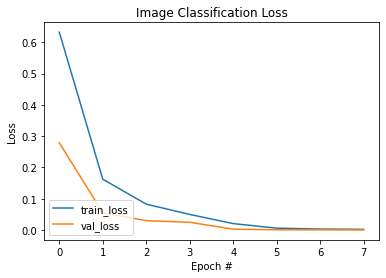

In [26]:
#plotting and examine the data wheteher it is fit, overfit, underfit
N= 8
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Image Classification Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

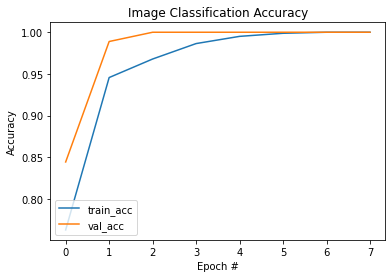

In [27]:
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Image Classification Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [28]:
model.evaluate(Xtest,ytest)

4/4 [==============================] - 2s 516ms/step - loss: 0.1133 - accuracy: 0.9800


[0.11332117021083832, 0.9800000190734863]

In [29]:
y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        44
           1       0.00      0.00      0.00        56

    accuracy                           0.44       100
   macro avg       0.22      0.50      0.31       100
weighted avg       0.19      0.44      0.27       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


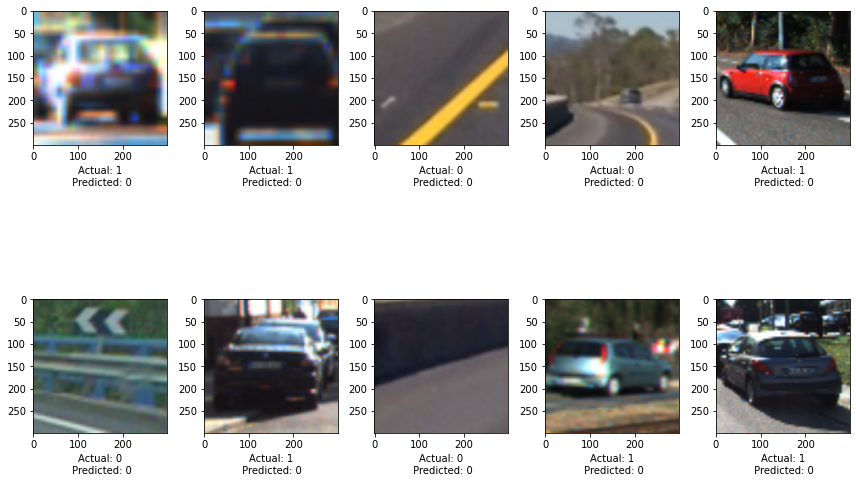

In [31]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = np.random.choice(range(len(Xtest)))
    plt.subplot(2,5,i+1)
    plt.imshow(Xtest[sample_idx])
    plt.xlabel(f"Actual: {ytest[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

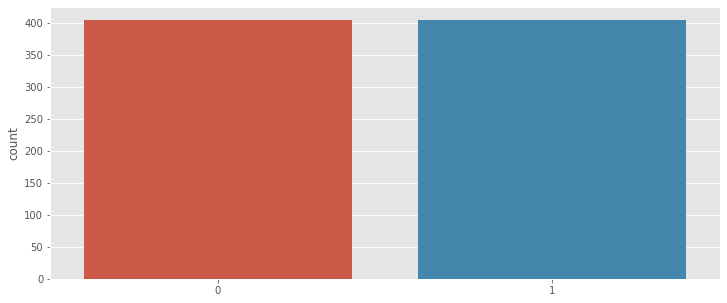

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12,5))
sns.countplot(x = ytrain)
plt.show()

In [33]:
#save the model in the form of .h5
model.save('drive/My Drive/ImageClassification.h5')

# Turn Image Classifier into Object Detector


1. Input Image 
2. Construct Image Pyramid
3. Run sliding window at each scale of image pyramid
  *   Each step of sliding window, extract ROI
  *   Take ROI and passit to CNN image classifier
  *   Set minimum probability, it it is passed record (class, label, box location
4. Apply Class wise NMS
5. Return Result